In [1]:
from matrix import Matrix
from matrix_algorithms import solve_jacobi, solve_gauss_seidel, solve_lu
from helper import get_A, get_B, display_math
from IPython.display import display, Math
import matplotlib.pyplot as plt

index_number = 193044
n = 900 + 10 * (index_number % 100 // 10) + (index_number % 10)
a = get_A(n, 5 + index_number % 1000 // 100, -1, -1)
display_math(f'n = {n}')
display_math(f'a_1 = {5 + index_number % 1000 // 100}')
display_math(f'a_2 = a_3 = -1')
display_math('A = ' + a.to_latex())
b = get_B(n, (index_number % 10000 // 1000) + 1)
display_math('B = ' + b.to_latex())

print(a.to_typst())
print(b.to_typst())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

mat(5, -1, -1, 0, 0, 0, 0, 0, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
-1, 5, -1, -1, 0, 0, 0, 0, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
-1, -1, 5, -1, -1, 0, 0, 0, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, -1, -1, 5, -1, -1, 0, 0, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, -1, -1, 5, -1, -1, 0, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, 0, -1, -1, 5, -1, -1, 0, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, 0, 0, -1, -1, 5, -1, -1, 0, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, 0, 0, 0, -1, -1, 5, -1, -1, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, 0, 0, 0, 0, -1, -1, 5, -1, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
0, 0, 0, 0, 0, 0, 0, -1, -1, 5, dots.h, 0, 0, 0, 0, 0, 0, 0, 0, 0;
dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.down, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v, dots.v;
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dots.h, 5, -1, -1, 0, 0, 0, 0, 0, 0;
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, dots.h, -1, 5, -1, -1, 0, 0, 0, 0, 0;
0, 0, 0, 0, 0,

In [2]:
r, i, jacobi_e, c = solve_jacobi(a, b)
display_math(f'\\text{{Solved using Jacobi method in {i} iterations with error = {format(jacobi_e[-1], ".2e") :}}}')
display_math(f'Converges: {c}')
display_math('X = ' + r.to_latex())

KeyboardInterrupt: 

In [ ]:
r, i, gauss_e, c = solve_gauss_seidel(a, b)
display_math(f'\\text{{Solved using Gauss-Seidel method in {i} iterations with error = {format(gauss_e[-1], ".2e") :}}}')
display_math(f'Converges: {c}')
display_math('X = ' + r.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Gauss-Seidel Method Error Norm')

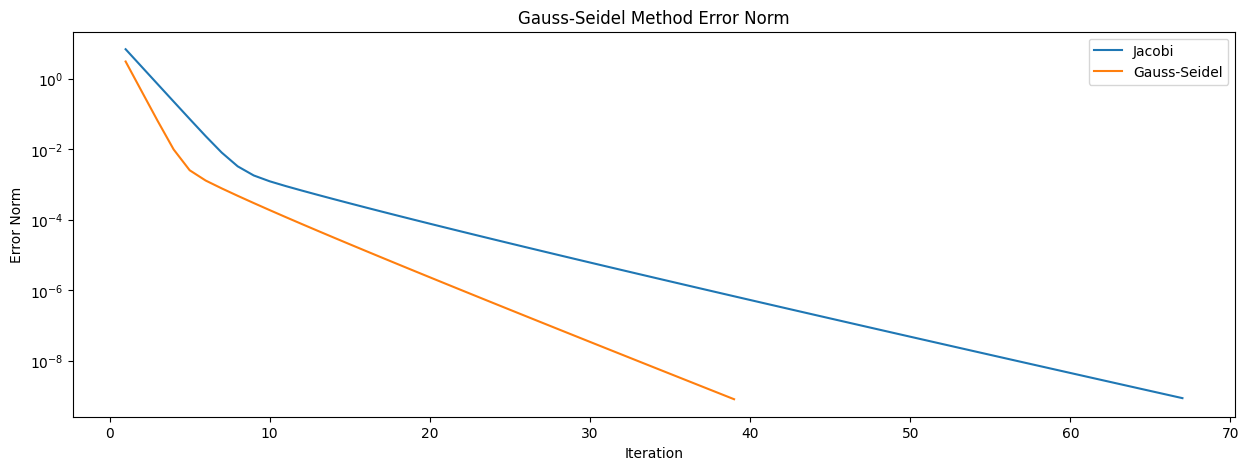

: 

In [ ]:
plt.figure(figsize=(15, 5))
plt.yscale("log")
plt.plot(jacobi_e)
plt.plot(gauss_e)
plt.xlabel("Iteration")
plt.ylabel("Error Norm")
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.title("Gauss-Seidel Method Error Norm")

In [ ]:
a = get_A(n, 3, -1, -1)
display_math(f'n = {n}')
display_math(f'a_1 = 3')
display_math(f'a_2 = a_3 = -1')
display_math('A = ' + a.to_latex())
b = get_B(n, (index_number % 10000 // 1000) + 1)
display_math('B = ' + b.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
r, i, e, c = solve_jacobi(a, b)
display_math(f'\\text{{Solved using Jacobi method in {i} iterations with error = {format(e[-1], ".2e") :}}}')
display_math(f'Converges: {c}')
display_math('X = ' + r.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
r, i, e, c = solve_gauss_seidel(a, b)
display_math(f'\\text{{Solved using Gauss-Seidel method in {i} iterations with error = {format(e[-1], ".2e") :}}}')
display_math(f'Converges: {c}')
display_math('X = ' + r.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
r, e = solve_lu(a, b)
display_math(f'\\text{{Solved using LU method with error = {format(e, ".2e") :}}}')
display_math('X = ' + r.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>